<a href="https://colab.research.google.com/github/jyothishri184/Machine-Learning-Algorithms/blob/main/11_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and pandas functions

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
!pip install tabulate

In [113]:
import pandas as pd

In [114]:
df=pd.read_csv("https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/Loan%20Status.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [115]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [117]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [118]:
df.isna().sum().sum()

149

In [119]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [120]:
col = ["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area","Loan_Status"]

for i in col:
  print(df[i].value_counts())
  print()
  print()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

In [121]:
type(df)

pandas.core.frame.DataFrame

In [122]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [123]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [124]:
df.size

7982

In [125]:
df.shape

(614, 13)

In [126]:
df.isna().sum().sum()

149

In [127]:
df1=df.dropna()
df1.shape

(480, 13)

# ONE HOT VS LABEL ENCODING

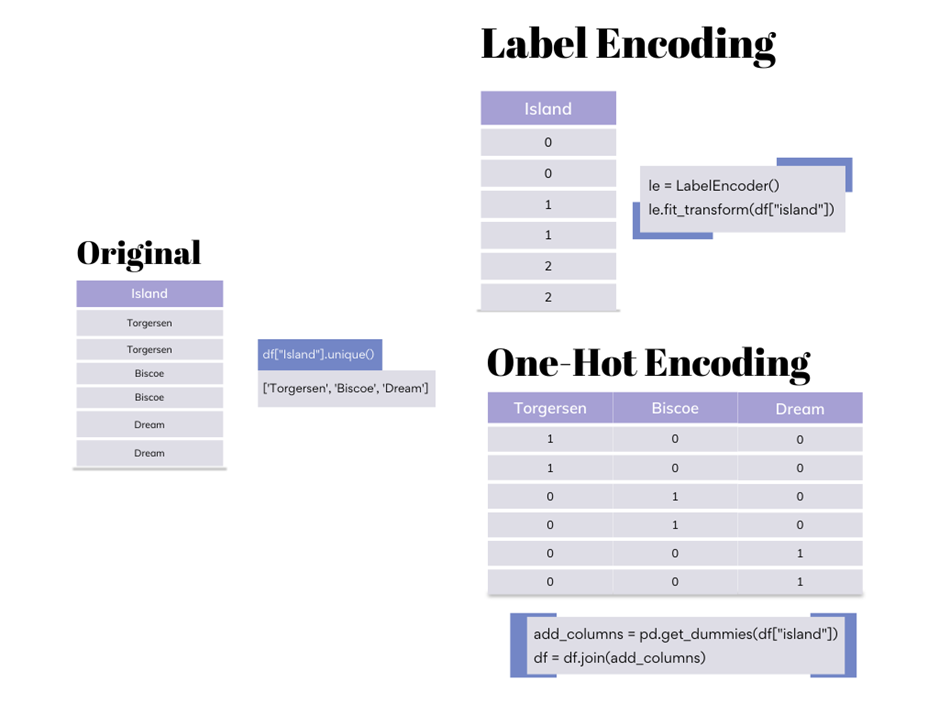

## LABEL ENCODING

In [139]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

col_le = ["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area","Loan_Status"]
for i in col_le:
  df1[i] = encoder.fit_transform(df1[i])
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


* The .fit method finds the values that we need for our formula, but it does not apply the formula to our data. It does not change our data in any way.


* The .transform method tranforms the data using that formula

In [135]:
df1.shape

(480, 13)

In [136]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    int64  
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    object 
dtypes: float64(3), int64(8), object(2)
memory usage: 52.5+ KB


## GET DUMMIES

In [137]:
''' one_hot_encoded_data = pd.get_dummies(df1, columns = ["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area","Loan_Status"])
one_hot_encoded_data '''

' one_hot_encoded_data = pd.get_dummies(df1, columns = ["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area","Loan_Status"])\none_hot_encoded_data '

In [138]:
''' one_hot_encoded_data.info() '''

' one_hot_encoded_data.info() '

## ONE HOT

Sample  Color

1       Red

2       Green

3       Blue



sparse=false ie dense

Sample  Red  Green  Blue

1       1    0      0

2       0    1      0

3       0    0      1



sparse

(0, 0)  1   # Sample 1, Red

(1, 1)  1   # Sample 2, Green

(2, 2)  1   # Sample 3, Blue

df_encoded = pd.DataFrame(onehot.fit_transform(df[categorical_columns]),columns=onehot.get_feature_names_out(categorical_columns))



onehot.fit_transform(df[categorical_columns]):

This part fits the OneHotEncoder to the selected categorical columns of the DataFrame (df) and transforms those columns into a one-hot encoded representation.



columns=onehot.get_feature_names_out(categorical_columns):

This part sets the column names of the resulting DataFrame using the feature names obtained from the OneHotEncoder. get_feature_names_out generates names for the one-hot encoded columns based on the original column names.

In [133]:
''' from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False)
df_encoded = pd.DataFrame(onehot.fit_transform(df[["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area"]]),
columns = onehot.get_feature_names_out(["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area"]))
df_encoded '''

,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Credit_History_0.0,Credit_History_1.0,Credit_History_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
610,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
611,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
612,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# model

## train test split

In [141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    int64  
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 52.5+ KB


In [147]:
X = df1.drop(columns=["Loan_ID","Loan_Status"])
y = df1["Loan_Status"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

df1.shape

(480, 13)

In [148]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(336, 11)
(144, 11)
(336,)
(144,)


## standardising and normalising

In [152]:
from tabulate import tabulate

# Data for the comparison table
comparison_data = [
    ["Purpose", "Ensures zero mean and unit variance", "Brings values to a specific range, typically [0, 1]"],
    ["Scale", "Mean = 0, Standard Deviation = 1", "Range between 0 and 1"],
    ["Sensitivity to Outliers", "Less sensitive", "Sensitive"],
    ["Scikit-Learn Implementation", "`StandardScaler()`", "`MinMaxScaler()`"]
]

# Display the table
table = tabulate(comparison_data, headers=["", "Standardization", "Normalization"], tablefmt="github", numalign="left")
print(table)


|                             | Standardization                     | Normalization                                       |
|-----------------------------|-------------------------------------|-----------------------------------------------------|
| Purpose                     | Ensures zero mean and unit variance | Brings values to a specific range, typically [0, 1] |
| Scale                       | Mean = 0, Standard Deviation = 1    | Range between 0 and 1                               |
| Sensitivity to Outliers     | Less sensitive                      | Sensitive                                           |
| Scikit-Learn Implementation | `StandardScaler()`                  | `MinMaxScaler()`                                    |


In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, criterion='gini' )
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [165]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy*100 ,"%")
print("Classification Report:\n", report)

Accuracy: 77.77777777777779 %
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.45      0.56        44
           1       0.79      0.92      0.85       100

    accuracy                           0.78       144
   macro avg       0.75      0.69      0.70       144
weighted avg       0.77      0.78      0.76       144

